In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\nagor\Documents\Thebridge\Machine_Learning\imdb\src\data\final_df.csv')

In [4]:
df

,averageRating,rating_cat,numVotes,titleType,primaryTitle,startYear,runtimeMinutes,genres,primaryName,titleType_num,...,Documentary,War,Sport,Musical,Western,Adult,Reality-TV,Talk-Show,News,Game-Show
0,6.4,regular,91761,movie,Kate & Leopold,2001.0,118.0,"Comedy,Fantasy,Romance",Hugh Jackman,0,...,0,0,0,0,0,0,0,0,0,0
1,6.4,regular,373,movie,"Another Time, Another Place",1983.0,118.0,"Drama,War",Giovanni Mauriello,0,...,0,1,0,0,0,0,0,0,0,0
2,7.4,buena,2096,movie,Let There Be Light,1980.0,58.0,"Documentary,War",Walter Huston,0,...,1,1,0,0,0,0,0,0,0,0
3,6.1,regular,175,movie,"Habla, mudita",1973.0,88.0,Drama,José Luis López Vázquez,0,...,0,0,0,0,0,0,0,0,0,0
4,3.5,mala,199,short,Crossroads of Laredo,1995.0,30.0,"Short,Western",Edward D. Wood Jr.,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254627,3.6,mala,263,movie,Safeguard,2020.0,95.0,"Action,Adventure,Thriller",Patrick Gallagher,0,...,0,0,0,0,0,0,0,0,0,0
254628,8.0,buena,274,tvEpisode,The Great Experiment,2019.0,43.0,"Drama,Thriller",Tim Daly,2,...,0,0,0,0,0,0,0,0,0,0
254629,8.0,buena,319,tvEpisode,Better Angels,2019.0,42.0,"Drama,Thriller",Tim Daly,2,...,0,0,0,0,0,0,0,0,0,0
254630,5.8,regular,1507,movie,Il talento del calabrone,2020.0,84.0,Thriller,Sergio Castellitto,0,...,0,0,0,0,0,0,0,0,0,0


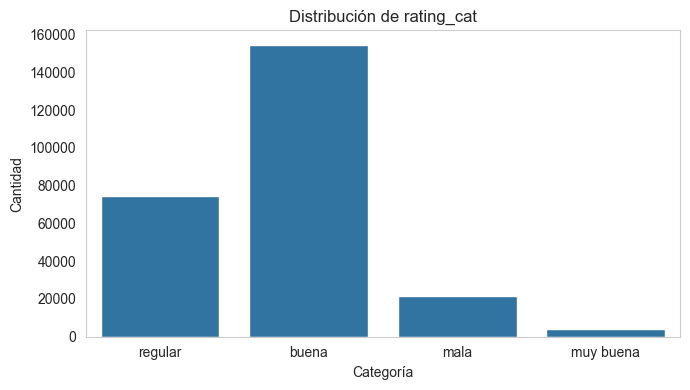

In [47]:
# Gráfico de distribución de la variable objetivo 'rating_cat'
plt.figure(figsize=(7, 4))
sns.countplot(x=y)
plt.title('Distribución de rating_cat')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [46]:
df_final = df.drop(columns=['genres', 'titleType', 'primaryTitle', 'averageRating', 'primaryName', 'log_numVotes'], inplace=False)

### LIBRERÍAS

In [4]:
# Librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### REALIZAR TRAIN TEST SPLIT

In [5]:
# Seleccionamos las variables predictoras y la variable objetivo
X = df_final.drop(['rating_cat'], axis=1)
y = df_final['rating_cat']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
X_train


,numVotes,startYear,runtimeMinutes,titleType_num,decade,actor_mean_rating,Drama,Comedy,Action,Crime,...,Documentary,War,Sport,Musical,Western,Adult,Reality-TV,Talk-Show,News,Game-Show
8945,452,1983.0,91.0,0,1980.0,4.6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123409,14178,2021.0,108.0,0,2020.0,7.6,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
64490,342,2005.0,45.0,2,2000.0,7.7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101231,232,2007.0,41.0,2,2000.0,7.6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23270,203,1994.0,128.0,0,1990.0,5.8,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30448,1476,2000.0,97.0,0,2000.0,5.4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
225643,1508,2017.0,23.0,2,2010.0,6.9,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
149398,337,2010.0,60.0,2,2010.0,7.4,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
56728,183,2006.0,60.0,5,2000.0,5.2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Escalado de características (para modelos como SVM, KNN y Logistic)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
#voy a probar primer con la columna actor mean rating 


### LINEAR REGRESSION MULTICLASE 

In [11]:
# Entrenar un modelo de regresión logística multiclase
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predicciones
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluación
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

       buena       0.84      0.90      0.87     30906
        mala       0.80      0.59      0.68      4337
   muy buena       0.76      0.06      0.11       826
     regular       0.69      0.68      0.68     14858

    accuracy                           0.80     50927
   macro avg       0.77      0.56      0.59     50927
weighted avg       0.79      0.80      0.79     50927

[[27759    22    15  3110]
 [  225  2568     0  1544]
 [  773     0    48     5]
 [ 4116   609     0 10133]]


In [9]:
#PROBEMOSLA AHORA SIN LA COLUMNA ACTOR_MEAN_RATING
final_df = df_final.drop(['actor_mean_rating'], axis=1).copy()

In [10]:

X = final_df.drop(['rating_cat'], axis=1)
y = final_df['rating_cat']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Entrenar un modelo de regresión logística multiclase
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predicciones
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluación
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

       buena       0.77      0.87      0.81     30906
        mala       0.59      0.27      0.37      4337
   muy buena       0.50      0.00      0.00       826
     regular       0.56      0.53      0.54     14858

    accuracy                           0.70     50927
   macro avg       0.60      0.42      0.43     50927
weighted avg       0.69      0.70      0.68     50927

[[26744    99     1  4062]
 [  994  1172     0  2171]
 [  772     4     1    49]
 [ 6296   699     0  7863]]


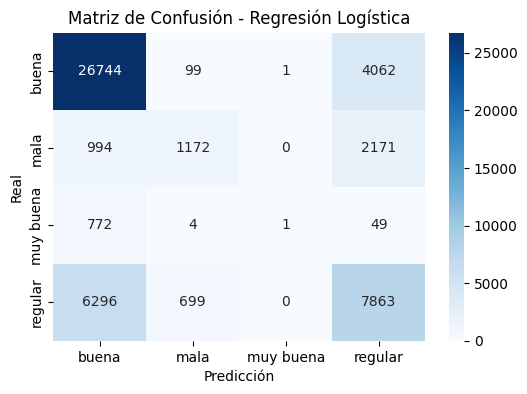

In [17]:
# Matriz de confusión gráfica para el modelo de regresión logística
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

In [16]:
# Entrenar un Random Forest Classifier básico (sin escalar)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Evaluación
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

       buena       0.86      0.87      0.86     30906
        mala       0.57      0.40      0.47      4337
   muy buena       0.60      0.30      0.40       826
     regular       0.63      0.68      0.65     14858

    accuracy                           0.76     50927
   macro avg       0.66      0.56      0.60     50927
weighted avg       0.76      0.76      0.76     50927

[[26782   181   149  3794]
 [  348  1750     2  2237]
 [  559     1   245    21]
 [ 3580  1135    10 10133]]


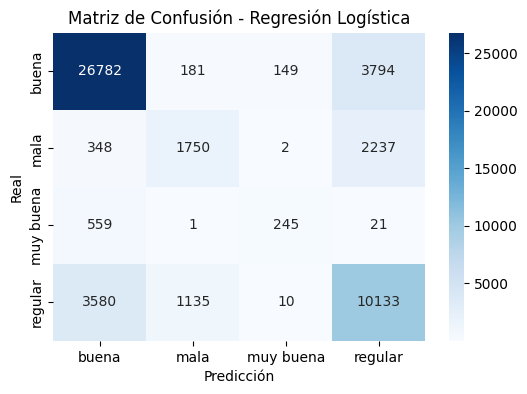

In [19]:
# Matriz de confusión gráfica para el modelo de randm Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

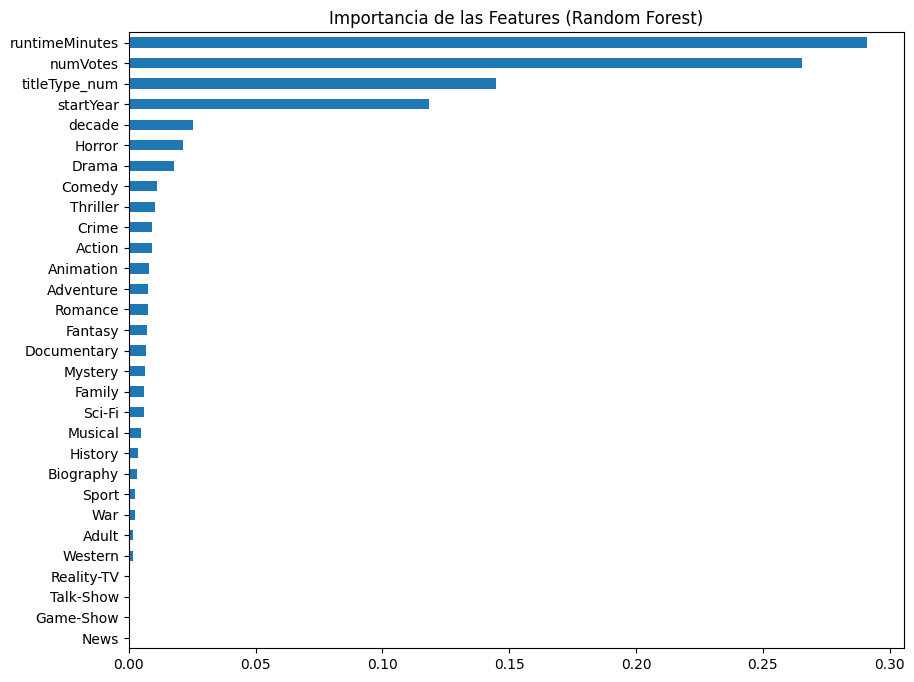

In [17]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values()
importances.plot(kind='barh', figsize=(10, 8), title='Importancia de las Features (Random Forest)')
plt.show()

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Mejores hiperparámetros:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor score:  0.5938385299663432
              precision    recall  f1-score   support

       buena       0.86      0.87      0.86     30906
        mala       0.57      0.40      0.47      4337
   muy buena       0.60      0.30      0.40       826
     regular       0.63      0.69      0.66     14858

    accuracy                           0.77     50927
   macro avg       0.67      0.56      0.60     50927
weighted avg       0.76      0.77      0.76     50927

[[26816   171   149  3770]
 [  355  1743     2  2237]
 [  557     1   248    20]
 [ 3534  1120    11 10193]]


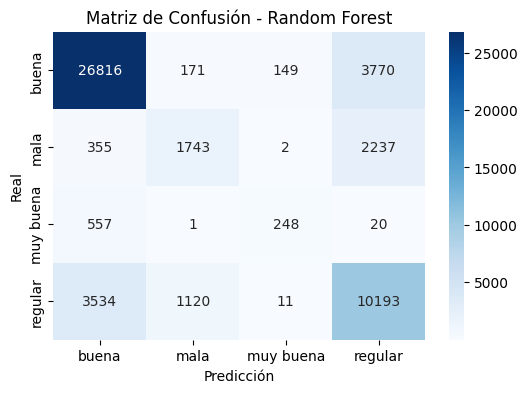

In [24]:
#vamos a desarrollar el random forest classifier con hiperparámetros
from sklearn.model_selection import GridSearchCV
# Definimos el modelo
rf = RandomForestClassifier(random_state=42)    
# Definimos los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
}   
# Definimos la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='f1_macro', cv=3, n_jobs=-1, verbose=2)
# Ajustamos el modelo
grid_search.fit(X_train, y_train)
# Imprimimos los mejores hiperparámetros
print("Mejores hiperparámetros: ", grid_search.best_params_)
# Imprimimos el mejor score
print("Mejor score: ", grid_search.best_score_)
# Entrenamos el modelo con los mejores hiperparámetros
best_rf = grid_search.best_estimator_

# Predicciones
y_pred_rf = best_rf.predict(X_test)
# Evaluación
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
# Matriz de confusión gráfica para el modelo de randm Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

In [13]:
# XGBClassifier espera etiquetas numéricas, 
# yo tengo la variable objetivo (y_train) etiquetas de texto como 'buena', 'mala'..

from sklearn.preprocessing import LabelEncoder

# Inicializamos el codificador
le = LabelEncoder()

# Ajustamos y transformamos y_train y y_test
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [ ]:
print(y_test_encoded)

In [ ]:

print(y_test.head(50))


128223      buena
76321       buena
38168     regular
62718       buena
129107    regular
53127     regular
42168     regular
176223      buena
17911     regular
113847      buena
197835      buena
47679       buena
254356      buena
242057      buena
179944      buena
192002      buena
161566       mala
157833      buena
207943    regular
41902        mala
129227       mala
241619      buena
147098       mala
164260      buena
188517      buena
219803      buena
243210      buena
126299    regular
134117       mala
239063      buena
134240    regular
139140      buena
125716    regular
14866     regular
34564     regular
254287    regular
4951      regular
244170      buena
90422     regular
83218     regular
12283       buena
46003       buena
16051       buena
32380     regular
102320       mala
129852      buena
96287       buena
222556    regular
251792      buena
29764       buena
Name: rating_cat, dtype: object
[0 0 3 ... 3 0 3]


Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:48:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores hiperparámetros:  {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 10, 'colsample_bytree': 0.8}
Mejor score:  0.5933980851682649
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     30906
           1       0.60      0.41      0.48      4337
           2       0.66      0.27      0.38       826
           3       0.63      0.70      0.66     14858

    accuracy                           0.77     50927
   macro avg       0.69      0.56      0.60     50927
weighted avg       0.77      0.77      0.77     50927

[[26891   140   107  3768]
 [  297  1765     2  2273]
 [  587     2   219    18]
 [ 3393  1046     5 10414]]


<Axes: >

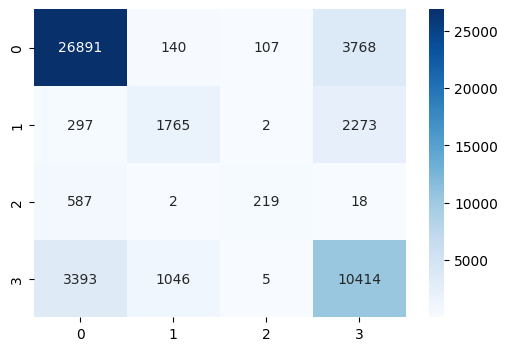

In [19]:
#xgbCLASIFIER
from xgboost import XGBClassifier   

#randomized search
from sklearn.model_selection import RandomizedSearchCV

# Definimos el modelo
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
# Definimos los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10, 20],
    'min_child_weight': [1, 2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
#definimos la búsqueda de cuadrícula con randomized search
grid_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, 
                                 scoring='f1_macro', n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
# Ajustamos el modelo
grid_search.fit(X_train, y_train_encoded)
# Imprimimos los mejores hiperparámetros

print("Mejores hiperparámetros: ", grid_search.best_params_)
# Imprimimos el mejor score
print("Mejor score: ", grid_search.best_score_)
# Entrenamos el modelo con los mejores hiperparámetros
best_xgb = grid_search.best_estimator_
# Predicciones
y_pred_xgb = best_xgb.predict(X_test)
# Evaluación
print(classification_report(y_test_encoded, y_pred_xgb))
print(confusion_matrix(y_test_encoded, y_pred_xgb))
# Matriz de confusión gráfica para el modelo de XGBOOST
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred_xgb), annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_encoded), yticklabels=np.unique(y_test_encoded))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:09:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores hiperparámetros:  {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 10, 'colsample_bytree': 0.8}
Mejor score:  0.602026153178544
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     30906
           1       0.46      0.58      0.51      4337
           2       0.33      0.54      0.41       826
           3       0.60      0.69      0.64     14858

    accuracy                           0.74     50927
   macro avg       0.57      0.65      0.60     50927
weighted avg       0.77      0.74      0.75     50927

[[24597   445   872  4992]
 [  160  2524     5  1648]
 [  352     4   444    26]
 [ 2120  2495    34 10209]]


<Axes: >

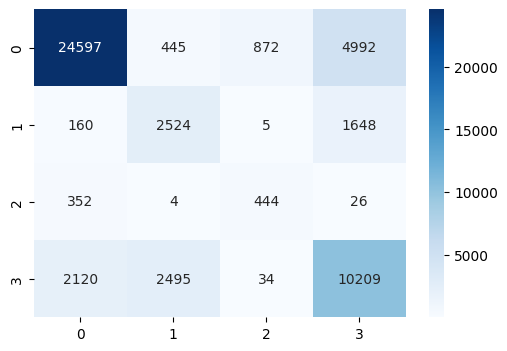

In [20]:
# voy a darle una oportunidad más al XGBoost calculando el peso de cada clase 
# con sample_weight   vamosa a ajustar la funciñon de pérdida para que sea más 
# sensible a las clases menos representadas

from sklearn.utils.class_weight import compute_sample_weight 
# Calcula los pesos para cada muestra basados en la frecuencia de su clase
weights = compute_sample_weight(class_weight='balanced', y=y_train_encoded)


# Definimos el modelo
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
# Definimos los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10, 20],
    'min_child_weight': [1, 2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

#definimos la búsqueda de cuadrícula con randomized search
grid_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, 
                                 scoring='f1_macro', n_iter=10, cv=3,
                                 n_jobs=-1, verbose=2, random_state=42)

# Ajustamos el modelo
grid_search.fit(X_train, y_train_encoded, sample_weight=weights)


# Imprimimos los mejores hiperparámetros

print("Mejores hiperparámetros: ", grid_search.best_params_)
# Imprimimos el mejor score
print("Mejor score: ", grid_search.best_score_)
# Entrenamos el modelo con los mejores hiperparámetros
best_xgb = grid_search.best_estimator_
# Predicciones
y_pred_xgb = best_xgb.predict(X_test)
# Evaluación
print(classification_report(y_test_encoded, y_pred_xgb))
print(confusion_matrix(y_test_encoded, y_pred_xgb))
# Matriz de confusión gráfica para el modelo de XGBOOST
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred_xgb), annot=True, fmt='d',
            cmap='Blues', 
            xticklabels=np.unique(y_test_encoded), 
            yticklabels=np.unique(y_test_encoded))

In [33]:
from sklearn.metrics import f1_score
print("F1 Macro:", f1_score(y_test_encoded, y_pred_xgb, average='macro'))
print("F1 Weighted:", f1_score(y_test_encoded, y_pred_xgb, average='weighted'))

F1 Macro: 0.6029064955555852
F1 Weighted: 0.7517036152704177


In [35]:
#lightgbm
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    objective='multiclass',
    num_class=4,
    learning_rate=0.1,
    n_estimators=200,
    max_depth=6,
    min_child_samples=30,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# sample_weight como con XGBoost
lgbm.fit(X_train, y_train_encoded, sample_weight=weights)

y_pred_lgbm = lgbm.predict(X_test)
print(classification_report(y_test_encoded, y_pred_lgbm))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,012846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 203705, number of used features: 30
[LightGBM] [Info] Start training from score -1,386294
[LightGBM] [Info] Start training from score -1,386294
[LightGBM] [Info] Start training from score -1,386294
[LightGBM] [Info] Start training from score -1,386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Con Parámetos muy similares y con el balanceo de clases, se ve claramente que XGBoost es mucho mejor que LightGBM ya que LightGBM crece los árboles por "hoja", lo que puede llevar a overfitting en clases pequeñas y underfitting en las grandes si no se ajusta bien.



In [ ]:
#experiemento con SVM aunque se que no es el mejor modelo para este tipo de problema
# ya que no manej bien el desvalance de clases 

from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train_encoded)
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test_encoded, y_pred_svm))

In [14]:
!pip install imbalanced-learn

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15}
              precision    recall  f1-score   support

           0       0.91      0.67      0.77     30906
           1       0.43      0.71      0.53      4337
           2       0.13      0.77      0.22       826
           3       0.58      0.63      0.60     14858

    accuracy                           0.66     50927
   macro avg       0.51      0.69      0.53     50927
weighted avg       0.76      0.66      0.69     50927

[[20587   603  4070  5646]
 [  123  3082    15  1117]
 [  152     9   638    27]
 [ 1823  3545   176  9314]]


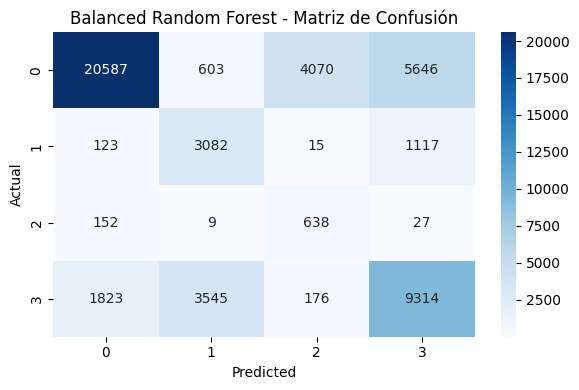

In [19]:
#importamos randomized search
from sklearn.model_selection import RandomizedSearchCV
#  Balanced Random Forest es una excelente opción para manejar clases desbalanceadas,

# ya que combina la aleatoriedad de los árboles de decisión con el muestreo balanceado
from imblearn.ensemble import BalancedRandomForestClassifier
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instancia del modelo
brf = BalancedRandomForestClassifier(random_state=42, n_jobs=-1)

# Búsqueda de hiperparámetros
search = RandomizedSearchCV(brf, param_distributions=param_dist,
                            scoring='f1_macro', n_iter=10, cv=3,
                            verbose=2, n_jobs=-1)

# Entrenamiento
search.fit(X_train, y_train_encoded)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", search.best_params_)

# Predicciones con el mejor modelo
y_pred_brf = search.best_estimator_.predict(X_test)

# Evaluación
print(classification_report(y_test_encoded, y_pred_brf))
print(confusion_matrix(y_test_encoded, y_pred_brf))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred_brf),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_encoded),
            yticklabels=np.unique(y_test_encoded))
plt.title("Balanced Random Forest - Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [28]:
# Como punto final ya que parece que estoy encontrando un tope de predicción con
# este dataset, es un modelo hibrido votingClassifier (XGBoost + Balanced RF)
from sklearn.ensemble import VotingClassifier
# Asegúrate de tener estos resultados del RandomizedSearchCV previamente
best_xgb_params = grid_search.best_params_
best_brf_params = search.best_params_

# Instanciar los modelos con sus mejores hiperparámetros
xgb = XGBClassifier(random_state=42, use_label_encoder=False,
                    eval_metric='mlogloss', **best_xgb_params)
# los ** desempaquetan el diccionario de hiperparámetros
brf = BalancedRandomForestClassifier(random_state=42, **best_brf_params)

# Crear el VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb), ('brf', brf)],
    voting='soft',  # soft = usa probabilidades
    weights=[2, 1]  # puedes ajustar según rendimiento
)

# Entrenar y evaluar
voting_clf.fit(X_train, y_train_encoded)
y_pred = voting_clf.predict(X_test)

# Evaluación
print(classification_report(y_test_encoded, y_pred))
print(confusion_matrix(y_test_encoded, y_pred))

c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:29:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.88      0.85      0.87     30906
           1       0.57      0.47      0.51      4337
           2       0.57      0.35      0.43       826
           3       0.63      0.71      0.67     14858

    accuracy                           0.77     50927
   macro avg       0.66      0.60      0.62     50927
weighted avg       0.77      0.77      0.77     50927

[[26388   168   212  4138]
 [  237  2024     2  2074]
 [  513     3   291    19]
 [ 2952  1338    10 10558]]


C:\Users\nagor\AppData\Local\Temp\ipykernel_8096\4136889714.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=f1_df, x='Clase', y='f1-score', palette='Set2')


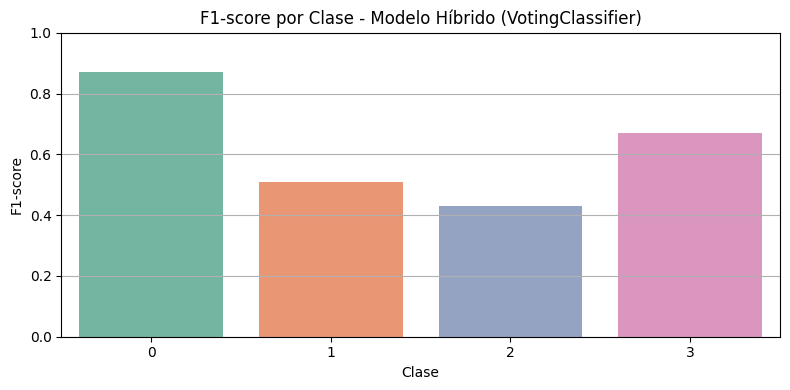

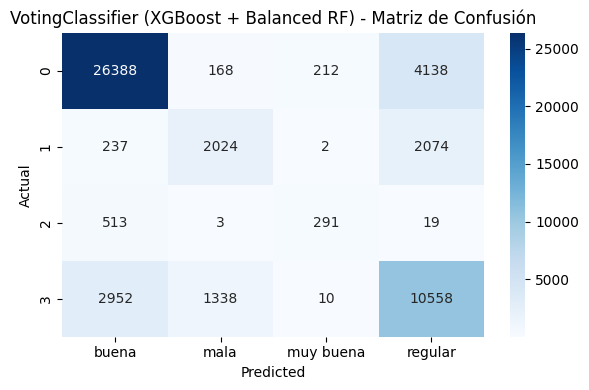

In [37]:


# F1-score por clas
report_data = {
    "0": {"f1-score": 0.87},
    "1": {"f1-score": 0.51},
    "2": {"f1-score": 0.43},
    "3": {"f1-score": 0.67}
}

# Crear DataFrame para F1-score
f1_df = pd.DataFrame.from_dict(report_data, orient='index')
f1_df.index.name = 'Clase'
f1_df.reset_index(inplace=True)

# Graficar F1-score
plt.figure(figsize=(8, 4))
sns.barplot(data=f1_df, x='Clase', y='f1-score', palette='Set2')
plt.title("F1-score por Clase - Modelo Híbrido (VotingClassifier)")
plt.ylim(0, 1)
plt.ylabel("F1-score")
plt.xlabel("Clase")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test_encoded))
plt.title("VotingClassifier (XGBoost + Balanced RF) - Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

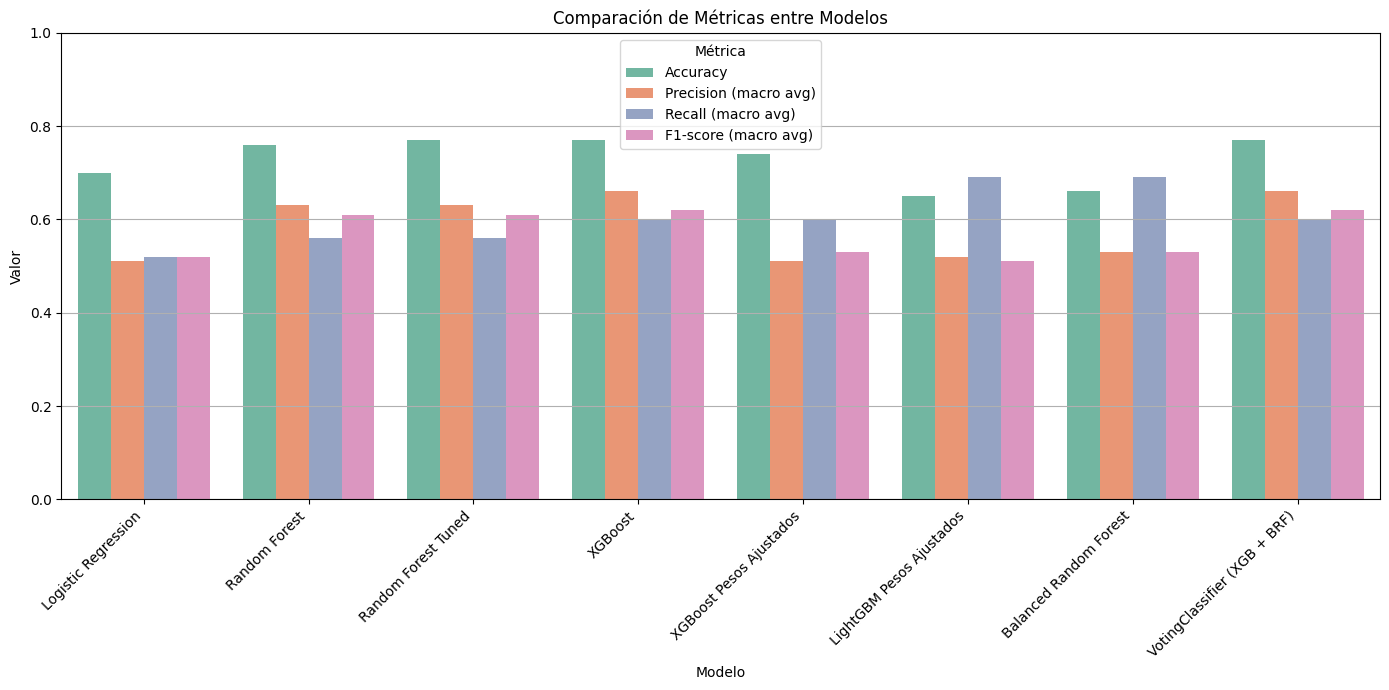

In [39]:
# Datos basados en tus tablas
data = {
    'Modelo': [
        'Logistic Regression',
        'Random Forest',
        'Random Forest Tuned',
        'XGBoost',
        'XGBoost Pesos Ajustados',
        'LightGBM Pesos Ajustados',
        'Balanced Random Forest',
        'VotingClassifier (XGB + BRF)'
    ],
    'Accuracy': [0.70, 0.76, 0.77, 0.77, 0.74, 0.65, 0.66, 0.77],
    'Precision (macro avg)': [0.51, 0.63, 0.63, 0.66, 0.51, 0.52, 0.53, 0.66],
    'Recall (macro avg)': [0.52, 0.56, 0.56, 0.60, 0.60, 0.69, 0.69, 0.60],
    'F1-score (macro avg)': [0.52, 0.61, 0.61, 0.62, 0.53, 0.51, 0.53, 0.62]
}

df_metrics = pd.DataFrame(data)

# Convertir a formato largo para seaborn
df_melted = df_metrics.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

# Gráfico de barras agrupadas
plt.figure(figsize=(14, 7))
sns.barplot(data=df_melted, x='Modelo', y='Valor', hue='Métrica', palette='Set2')
plt.title('Comparación de Métricas entre Modelos')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.ylabel('Valor')
plt.xlabel('Modelo')
plt.legend(title='Métrica')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\nagor\AppData\Local\Temp\ipykernel_8096\761047077.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Modelo', data=df_metrics, palette='muted')


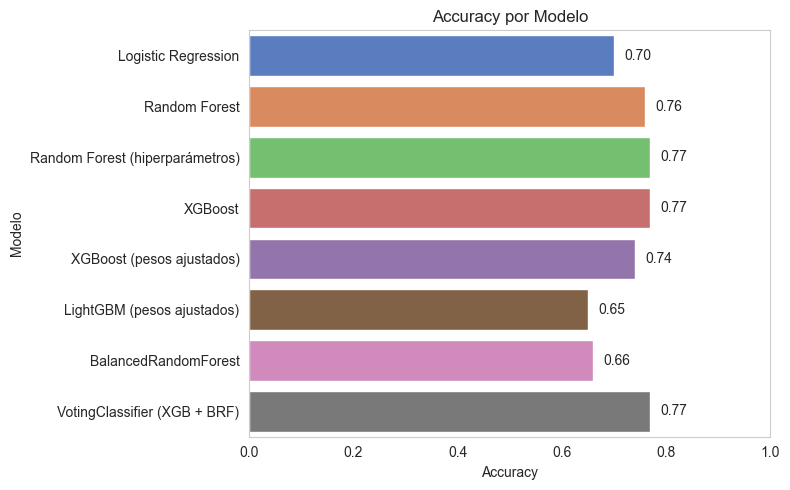

C:\Users\nagor\AppData\Local\Temp\ipykernel_8096\761047077.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Modelo', data=df_metrics, palette='muted')


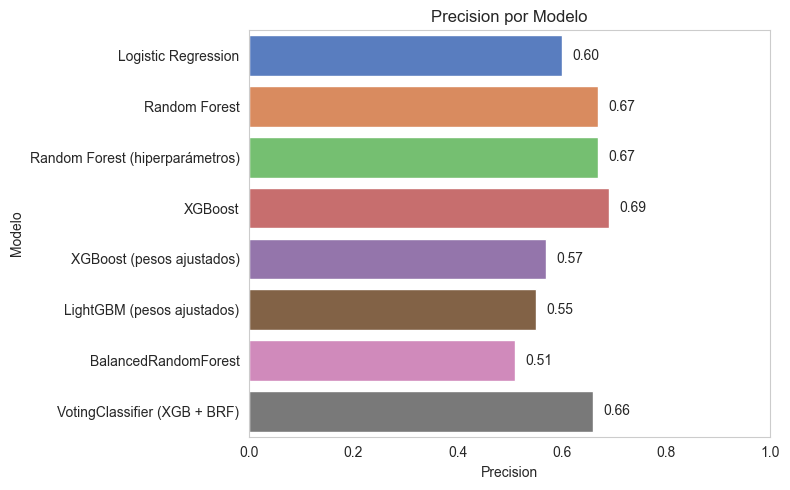

C:\Users\nagor\AppData\Local\Temp\ipykernel_8096\761047077.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Modelo', data=df_metrics, palette='muted')


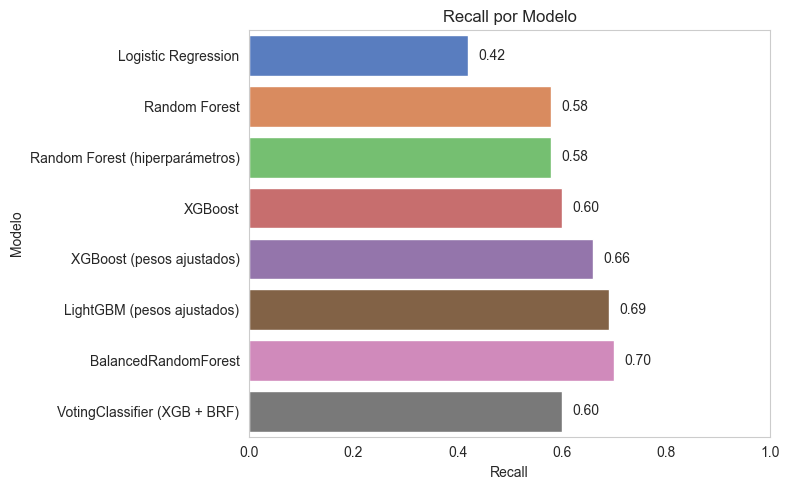

C:\Users\nagor\AppData\Local\Temp\ipykernel_8096\761047077.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Modelo', data=df_metrics, palette='muted')


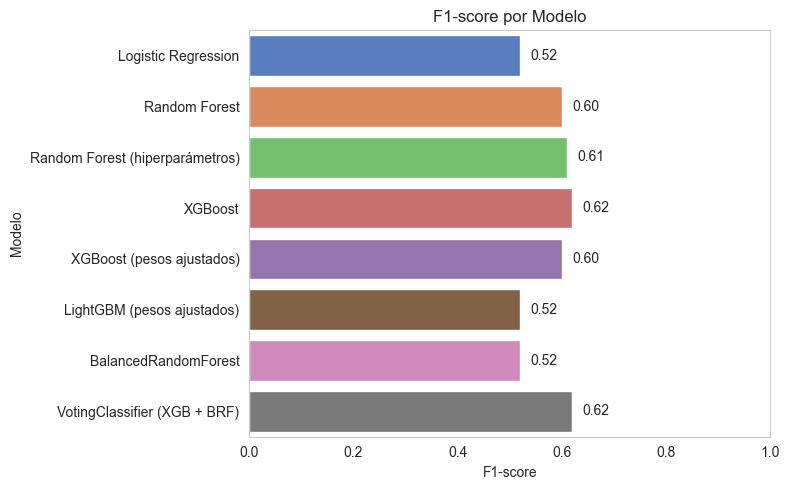

In [43]:
# Datos basados en las tablas que proporcionaste
data = {
    'Modelo': [
        'Logistic Regression',
        'Random Forest',
        'Random Forest (hiperparámetros)',
        'XGBoost',
        'XGBoost (pesos ajustados)',
        'LightGBM (pesos ajustados)',
        'BalancedRandomForest',
        'VotingClassifier (XGB + BRF)'
    ],
    'Accuracy': [0.70, 0.76, 0.77, 0.77, 0.74, 0.65, 0.66, 0.77],
    'Precision': [0.60, 0.67, 0.67, 0.69, 0.57, 0.55, 0.51, 0.66],  # promedio macro aproximado
    'Recall': [0.42, 0.58, 0.58, 0.60, 0.66, 0.69, 0.70, 0.60],     # promedio macro aproximado
    'F1-score': [0.52, 0.60, 0.61, 0.62, 0.60, 0.52, 0.52, 0.62]    # promedio macro aproximado
}

df_metrics = pd.DataFrame(data)

# Para que los modelos aparezcan en el orden dado (no alfabético)
df_metrics['Modelo'] = pd.Categorical(df_metrics['Modelo'], categories=data['Modelo'], ordered=True)

# Función para graficar cada métrica individualmente
def plot_metric(metric):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=metric, y='Modelo', data=df_metrics, palette='muted')
    plt.xlim(0, 1)
    plt.title(f'{metric} por Modelo')
    plt.xlabel(metric)
    plt.ylabel('Modelo')
    plt.grid(axis='x')
    for index, value in enumerate(df_metrics[metric]):
        plt.text(value + 0.02, index, f'{value:.2f}', va='center')
    plt.tight_layout()
    plt.show()

# Graficar cada métrica individualmente
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score']:
    plot_metric(metric)